# The Correlation Between Characters' Intimate Relationship And Novel Popularity

In [1]:
import spacy
import collections
import pandas as pd
from itertools import combinations
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Step 1 : Name Extraction

In [176]:
gardenNames = []
for key in gardenNlp:
    gardenName = []
    for ent in gardenNlp[key].ents:
        if ent.label_ == 'PERSON':
            gardenName.append(ent.text)
    gardenNames.append(collections.Counter(gardenName).most_common(10))
gardenNames

[[('Stanley', 36),
  ('Lottie', 35),
  ('Linda', 34),
  ('Kezia', 32),
  ('Beryl', 30),
  ('Jonathan', 21),
  ('Alice', 19),
  ('Harry Kember', 16),
  ('Pip', 10),
  ('Isabel', 7)],
 [('Laura', 78),
  ('Jose', 24),
  ('Laurie', 14),
  ('Sadie', 14),
  ('Godber', 7),
  ('Cook', 3),
  ('Meg', 2),
  ('Scott', 2),
  ('Breakfast', 1),
  ('Away Laura', 1)],
 [('Josephine', 109),
  ('Constantia', 76),
  ('Cyril', 27),
  ('Kate', 24),
  ('Con', 15),
  ('Nurse Andrews', 11),
  ('Jug', 8),
  ('Pinner', 7),
  ('Auntie Con', 7),
  ('Aunt Josephine', 6)],
 [('Reggie', 32),
  ('Anne', 25),
  ('Reginald', 12),
  ('Biddy', 3),
  ('Chinny', 2),
  ('Thou', 2),
  ('Roo', 2),
  ('Uncle Alick', 1),
  ('Snip', 1),
  ("Proctor's", 1)],
 [('Hennie', 11), ('Raddick', 2), ('Casino', 1)],
 [('Ma Parker', 13),
  ('Lennie', 7),
  ('Ma', 5),
  ('Gran', 3),
  ('Parker', 2),
  ('Ethel', 2),
  ('Shakespeare', 1),
  ('Breathe', 1),
  ('Maudie', 1),
  ('Alice', 1)],
 [('William', 58),
  ('Isabel', 29),
  ('Dennis', 8),


## Step 2 : Relationship Scores Calculation

In [187]:
gardenRelations = {}
for i in range(14):
    gardenParas = gardenStories[i].split('\n\n')
    combs = getRcombs(gardenNames[i])
    counter = {comb: 0 for comb in combs}
    for para in gardenParas: 
        for comb in combs: 
            if comb[0] in para and comb[1] in para: 
                counter[comb] += 1
    counterp = [counter[key] / len(gardenStories[i]) for key in counter]
    sum = 0
    for t in counterp:
        sum += t
    gardenRelations[gardenStories[i][:15]] = sum
gardenRelations

{'# 1. AT THE BAY': 0.0008286917538377934,
 '2. THE GARDEN P': 0.0012681038510311687,
 '3. THE DAUGHTER': 0.007567648303502526,
 '4. MR. AND MRS.': 0.0024014845540879805,
 '5. THE YOUNG GI': 0.00025045917515444983,
 '6. LIFE OF MA P': 0.005113594857184604,
 '7. MARRIAGE A L': 0.003881341835320212,
 '8. THE VOYAGE.\n': 0.00040334197637568423,
 '9. MISS BRILL.\n': 0.0007383479464697738,
 '10. HER FIRST B': 0.001971692134356736,
 '11. THE SINGING': 0.005706134094151213,
 '12. THE STRANGE': 0.002571417091887983,
 '13. BANK HOLIDA': 0.0,
 '14. AN IDEAL FA': 0.0025504627268090065}

## Step 3 : Visualization Analysis

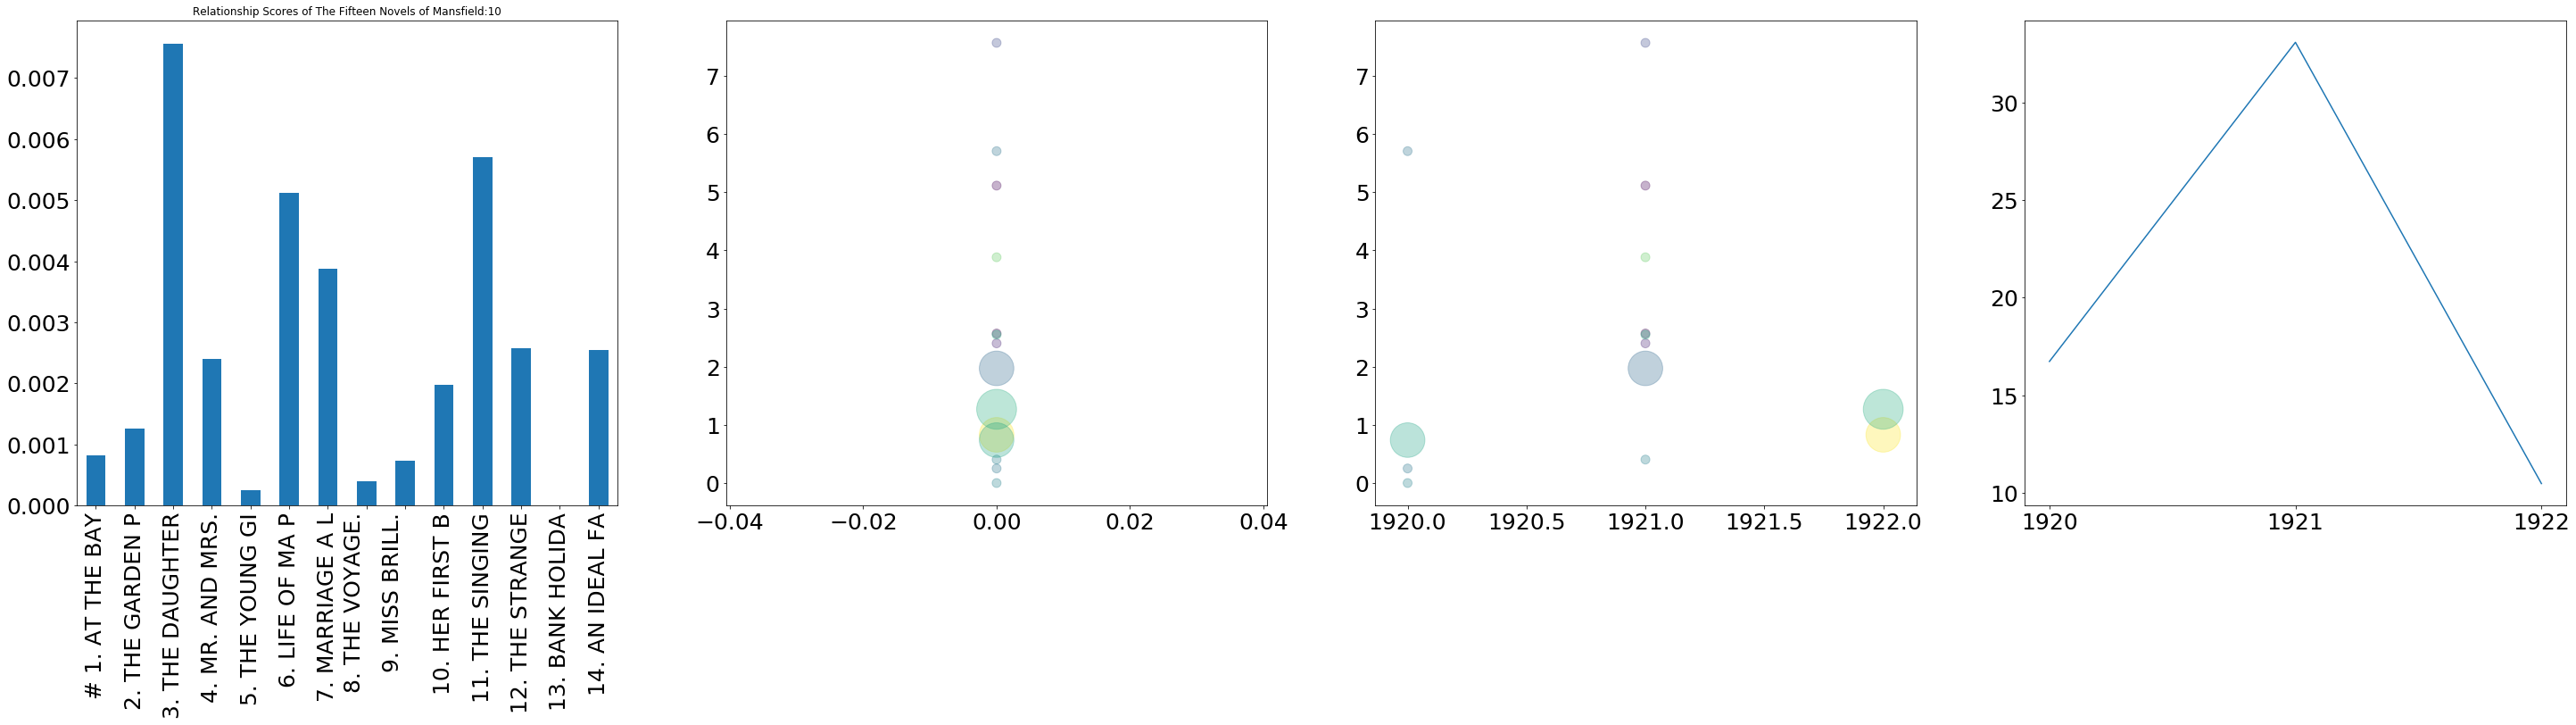

In [188]:
x_values = [gardenRelations[key]*1000 for key in gardenRelations]
y_values = [gardenYearss[key] for key in gardenYearss]

plt.subplot(1,4,1)
plt.tick_params(axis='both', which='major', labelsize=25)
pd.Series(gardenRelations).plot(kind = 'bar', figsize = (50,10),title = "Relationship Scores of The Fifteen Novels of Mansfield:10")
plt.subplot(1,4,2)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.scatter(y_value, x_values, c=colors, s=sizes, alpha=0.3, cmap='viridis')
#plt.show()

meanRelations = {"1920": meanRelation(1920)*10000, "1921": meanRelation(1921)*10000, "1922": meanRelation(1922)*10000}

plt.subplot(1,4,3)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.scatter(y_values, x_values, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.subplot(1,4,4)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.plot(meanRelations.keys(), meanRelations.values())
plt.show()

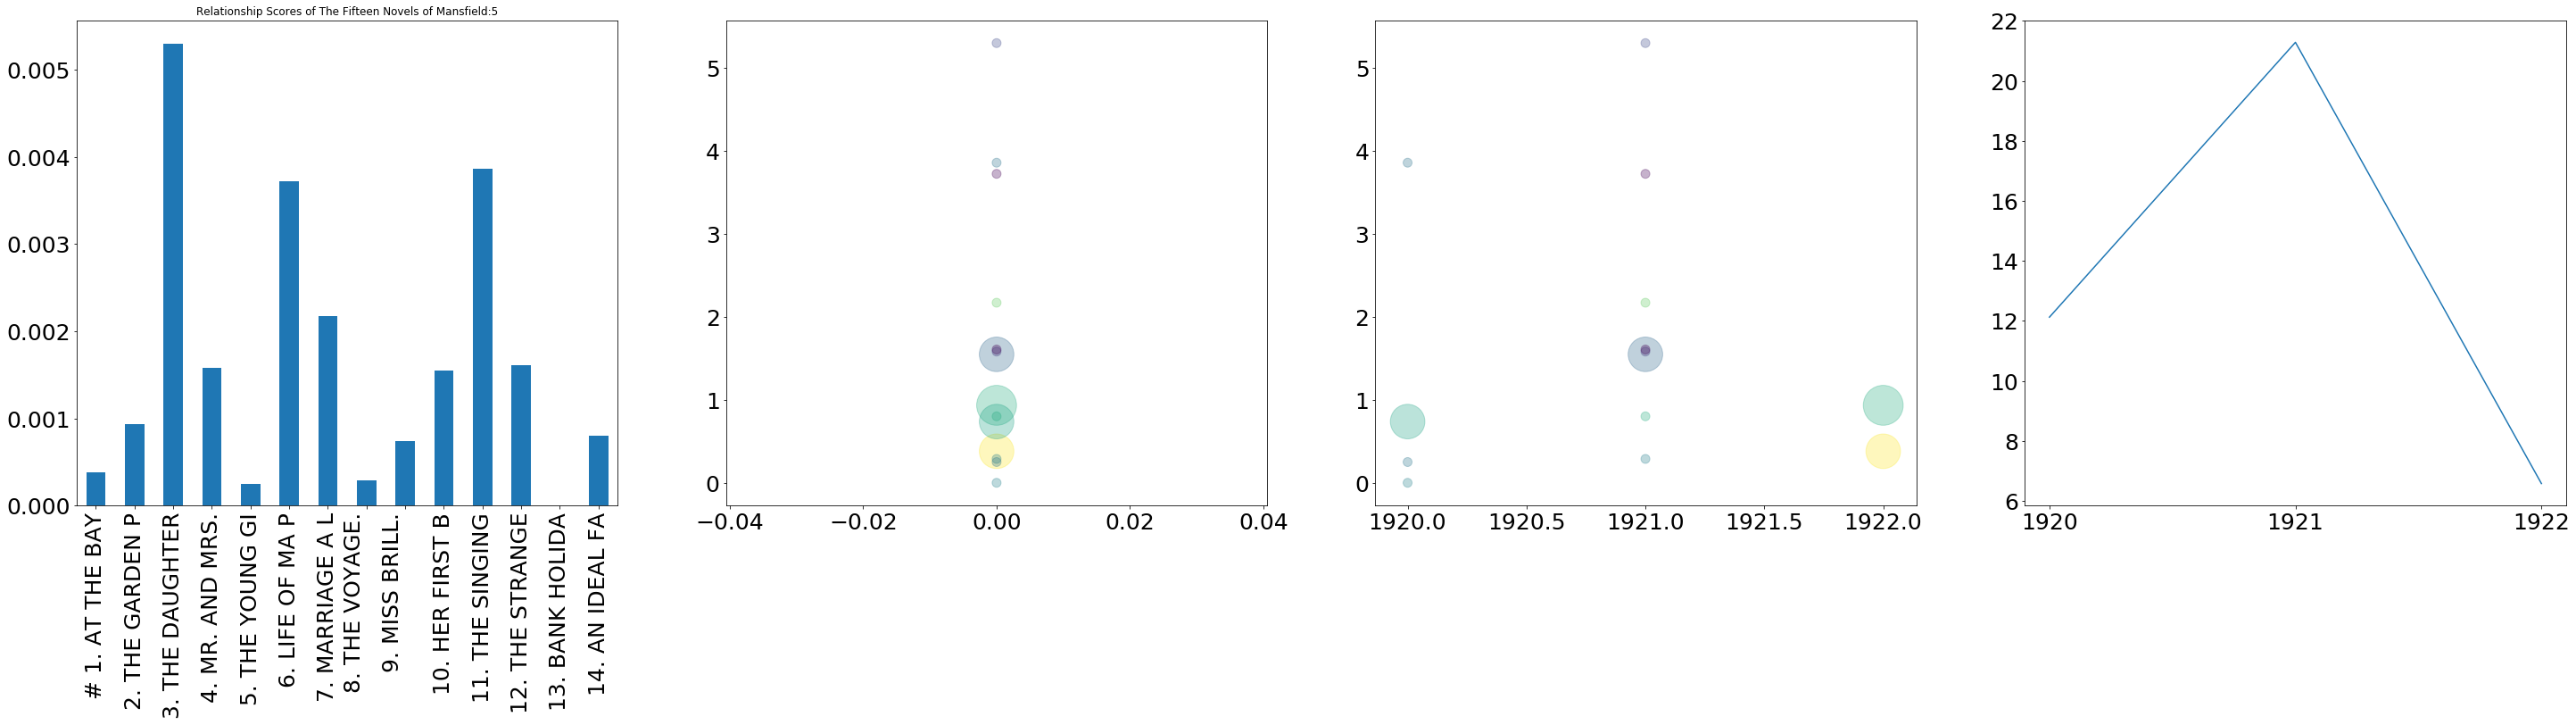

In [173]:
gardenNames = []
for key in gardenNlp:
    gardenName = []
    for ent in gardenNlp[key].ents:
        if ent.label_ == 'PERSON':
            gardenName.append(ent.text)
    gardenNames.append(collections.Counter(gardenName).most_common(5))
    
gardenRelations = {}
for i in range(14):
    gardenParas = gardenStories[i].split('\n\n')
    combs = getRcombs(gardenNames[i])
    counter = {comb: 0 for comb in combs}
    for para in gardenParas: 
        for comb in combs: 
            if comb[0] in para and comb[1] in para: 
                counter[comb] += 1
    counterp = [counter[key] / len(gardenStories[i]) for key in counter]
    sum = 0
    for t in counterp:
        sum += t
    gardenRelations[gardenStories[i][:15]] = sum
    
gardenRelations

x_values = [gardenRelations[key]*1000 for key in gardenRelations]
y_values = [gardenYearss[key] for key in gardenYearss]

plt.subplot(1,4,1)
plt.tick_params(axis='both', which='major', labelsize=25)
pd.Series(gardenRelations).plot(kind = 'bar', figsize = (50,10),title = "Relationship Scores of The Fifteen Novels of Mansfield:5")
plt.subplot(1,4,2)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.scatter(y_value, x_values, c=colors, s=sizes, alpha=0.3, cmap='viridis')
#plt.show()

meanRelations = {"1920": meanRelation(1920)*10000, "1921": meanRelation(1921)*10000, "1922": meanRelation(1922)*10000}

plt.subplot(1,4,3)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.scatter(y_values, x_values, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.subplot(1,4,4)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.plot(meanRelations.keys(), meanRelations.values())
plt.show()

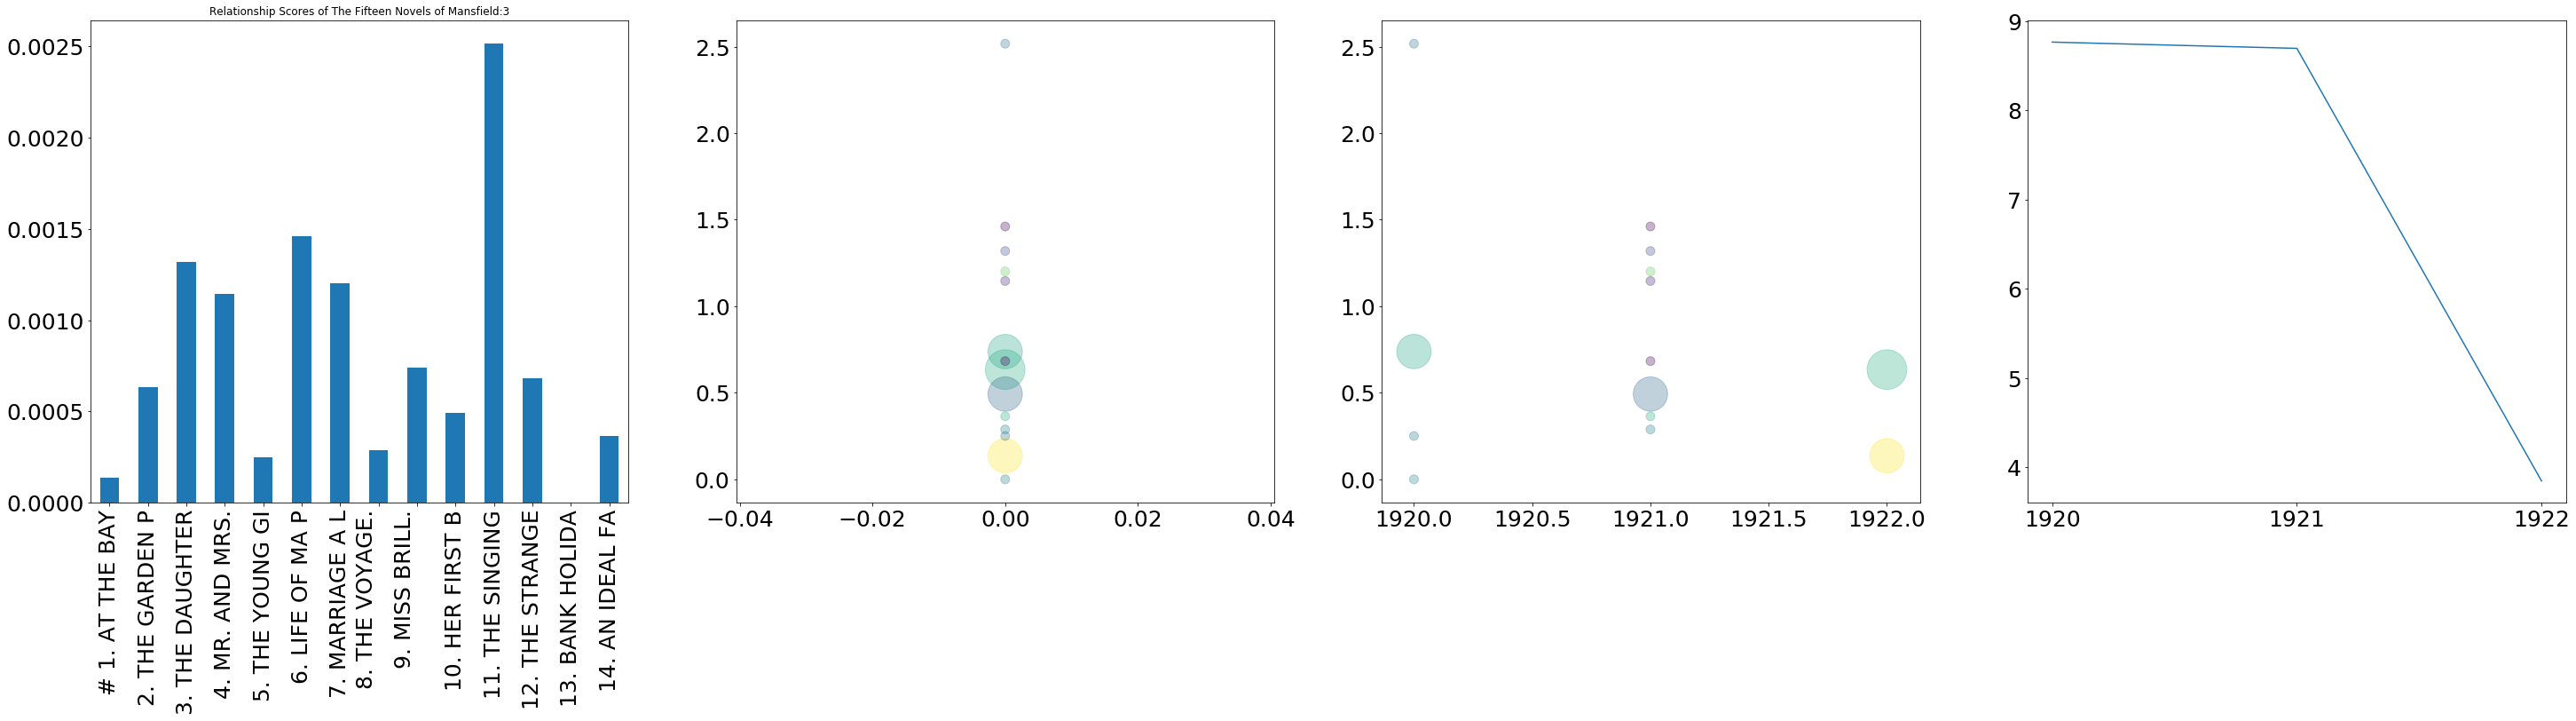

In [174]:
gardenNames = []
for key in gardenNlp:
    gardenName = []
    for ent in gardenNlp[key].ents:
        if ent.label_ == 'PERSON':
            gardenName.append(ent.text)
    gardenNames.append(collections.Counter(gardenName).most_common(3))
    
gardenRelations = {}
for i in range(14):
    gardenParas = gardenStories[i].split('\n\n')
    combs = getRcombs(gardenNames[i])
    counter = {comb: 0 for comb in combs}
    for para in gardenParas: 
        for comb in combs: 
            if comb[0] in para and comb[1] in para: 
                counter[comb] += 1
    counterp = [counter[key] / len(gardenStories[i]) for key in counter]
    sum = 0
    for t in counterp:
        sum += t
    gardenRelations[gardenStories[i][:15]] = sum
    
gardenRelations

x_values = [gardenRelations[key]*1000 for key in gardenRelations]
y_values = [gardenYearss[key] for key in gardenYearss]

plt.subplot(1,4,1)
plt.tick_params(axis='both', which='major', labelsize=25)
pd.Series(gardenRelations).plot(kind = 'bar', figsize = (50,10),title = "Relationship Scores of The Fifteen Novels of Mansfield:3")
plt.subplot(1,4,2)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.scatter(y_value, x_values, c=colors, s=sizes, alpha=0.3, cmap='viridis')
#plt.show()

meanRelations = {"1920": meanRelation(1920)*10000, "1921": meanRelation(1921)*10000, "1922": meanRelation(1922)*10000}

plt.subplot(1,4,3)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.scatter(y_values, x_values, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.subplot(1,4,4)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.plot(meanRelations.keys(), meanRelations.values())
plt.show()